In [270]:
#import librabries#

In [427]:
 import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score



# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [353]:
#Load data#
data = pd.read_csv(r"C:\Users\hp\Desktop\1. upgrade\1. STUDY material\6.  Machine Learning 2\Advanced Regression Assignment\train.csv")

In [273]:
## reading the dataset##

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [355]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [277]:
# Checking duplicates Values

In [356]:
percent =(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
percent.head(26)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
dtype: float64

In [357]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
data = data.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [360]:
data.shape

(1460, 75)

In [359]:
#lets treat missing values coloumn  
data[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [361]:
data['LotFrontage']= data.LotFrontage.fillna(data.LotFrontage.median())

In [362]:
data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].median())

In [363]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(data["GarageYrBlt"].median())

In [364]:
percent =(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
percent.head(20)

MasVnrType       59.726027
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
Electrical        0.068493
OpenPorchSF       0.000000
WoodDeckSF        0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
SaleCondition     0.000000
dtype: float64

In [288]:
#Visualising the variables wih missing values

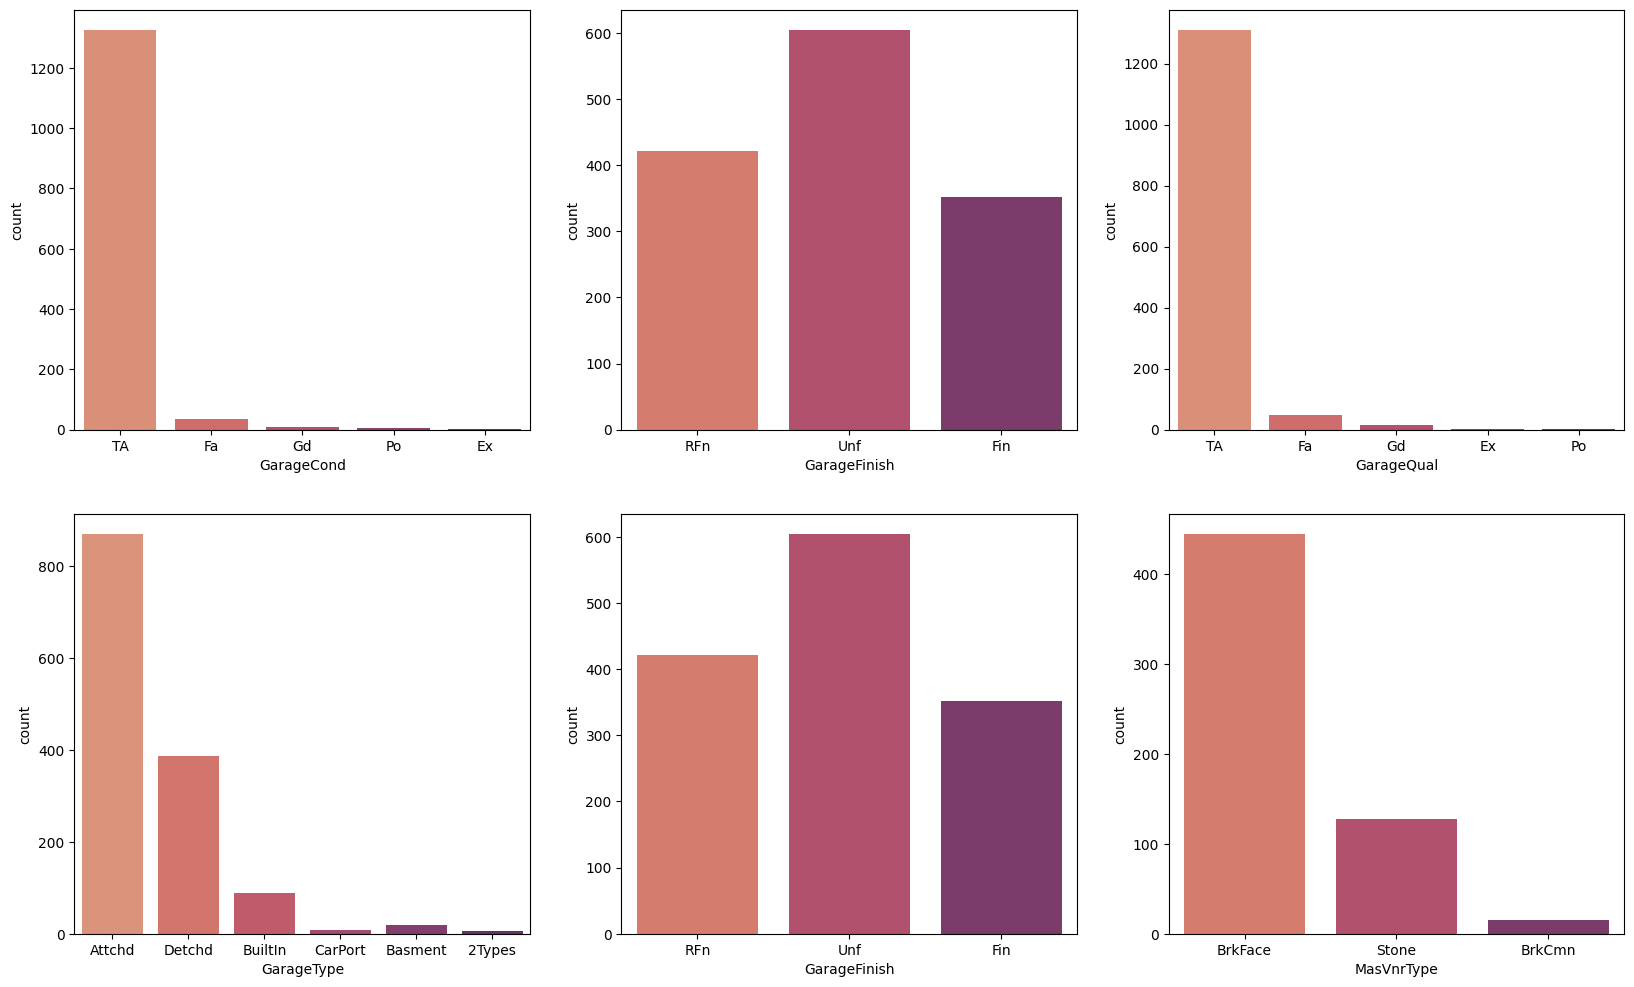

In [365]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = data , palette ="flare")

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = data ,palette ="flare")

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = data , palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = data, palette ="flare")
plt.show()

In [366]:
#we observe some property doesnt have garrage, lets replace null with "No_Garrage"
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')

In [368]:
#for Masonry veneer type replacing nan with the top option
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None')

In [292]:
#for Electrical system replacing nan with Standard Circuit Breakers & Romex 
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'SBrkr')

In [370]:
#changing num to categorical so as to form these as dummy variables 
data['MSSubClass']=data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

data['OverallQual']=data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
data['OverallCond']=data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

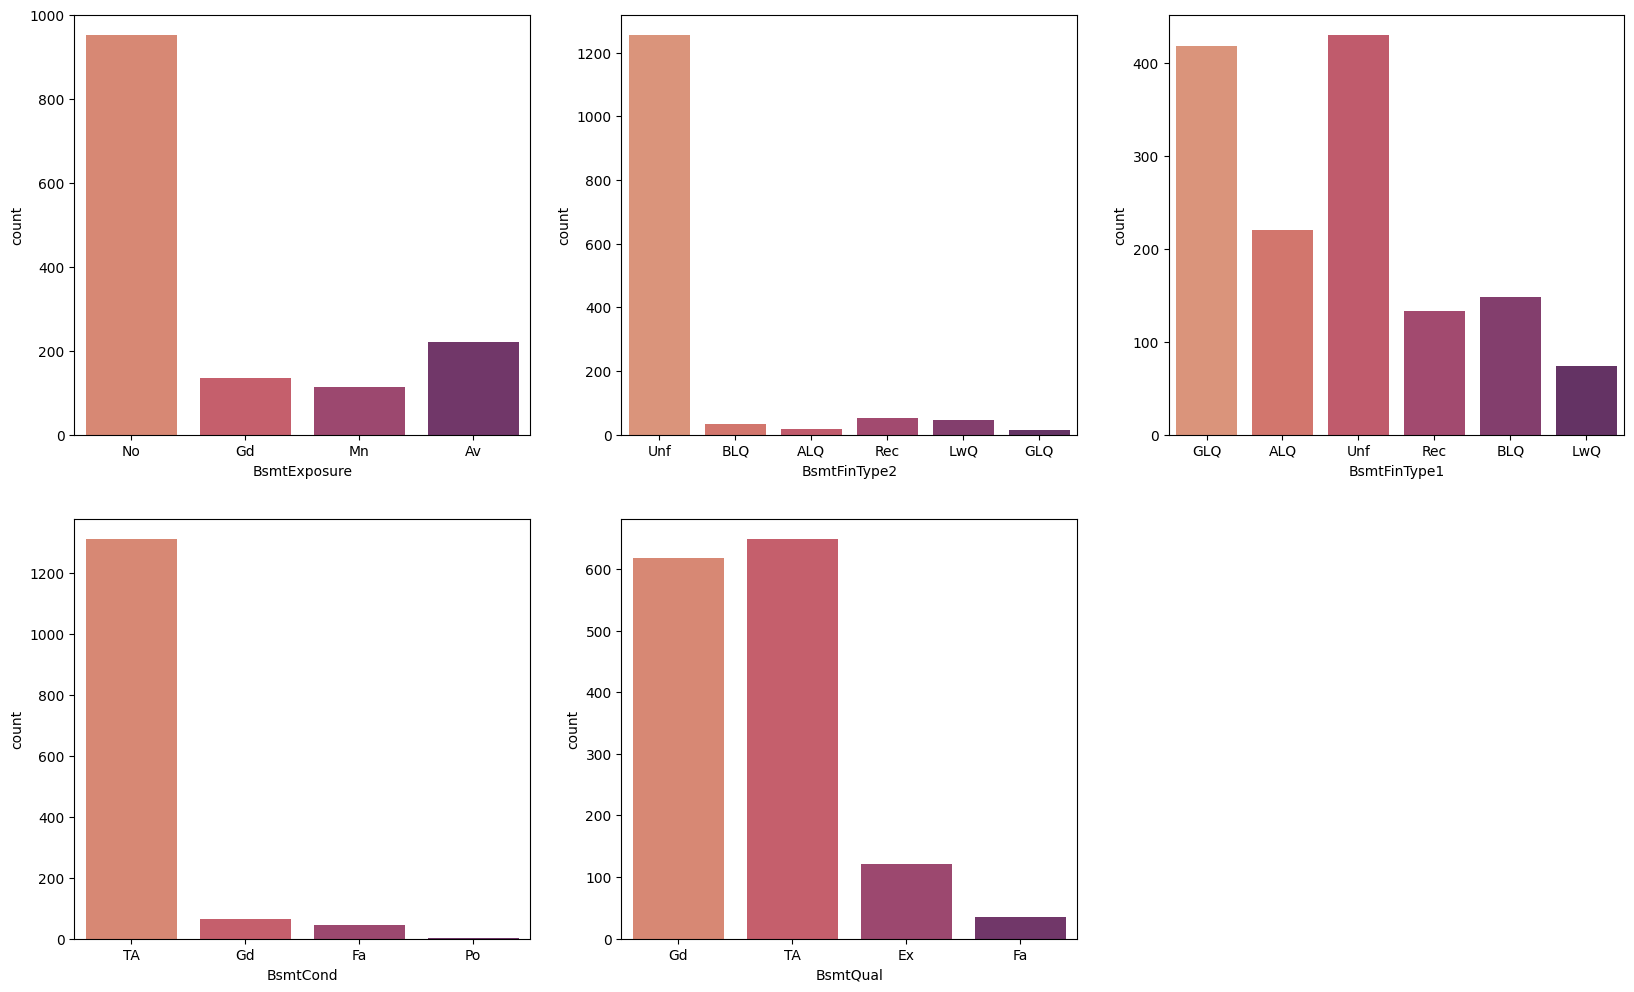

In [372]:
# lets analysis coloumns related to basement with help of countplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = data , palette ="flare")

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2', data = data , palette ="flare")

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1',data = data , palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond',data = data , palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',data = data , palette ="flare")

plt.show()

In [373]:
# Again null values beacuse of No Basement, Lets replace null with No Basement

data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')

In [375]:
#lets cheack anything leftout while treating null values.
percent1 =(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
percent1.head(20)

Electrical      0.068493
MSSubClass      0.000000
HalfBath        0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
FullBath        0.000000
GarageYrBlt     0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
GarageType      0.000000
GarageFinish    0.000000
HeatingQC       0.000000
dtype: float64

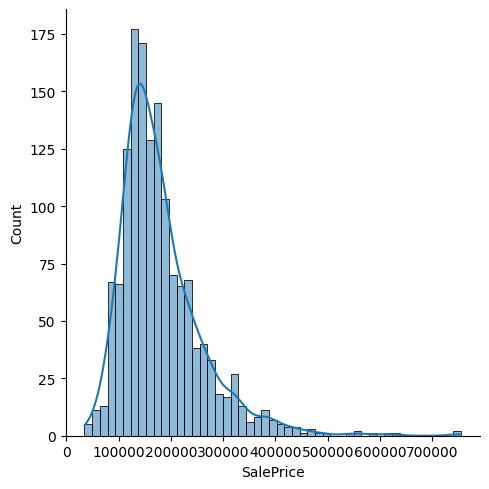

In [297]:
#Let's check the dependent variable i.e SalePrice
sns.displot(data["SalePrice"], kde=True)

# we can say its skiewed. 

In [298]:
data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [299]:
print(data["SalePrice"].skew())

1.8828757597682129


In [377]:
 #tranforming to form normal disribution
data['SalePrice']=np.log(data.SalePrice)

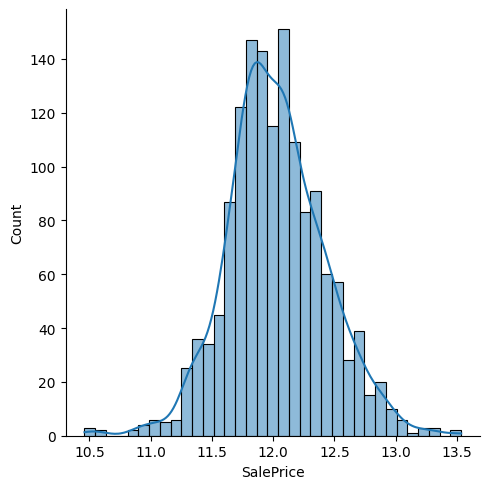

In [378]:
sns.displot(data["SalePrice"], kde=True)

In [379]:
print(data["SalePrice"].skew())

0.12133506220520406


In [303]:
#Let's check all the Categorical columns and their effect on price.
# as we have many columns so let's make groups randomly and visualize effect of that variable on dependent variable

In [381]:
Cat = data.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

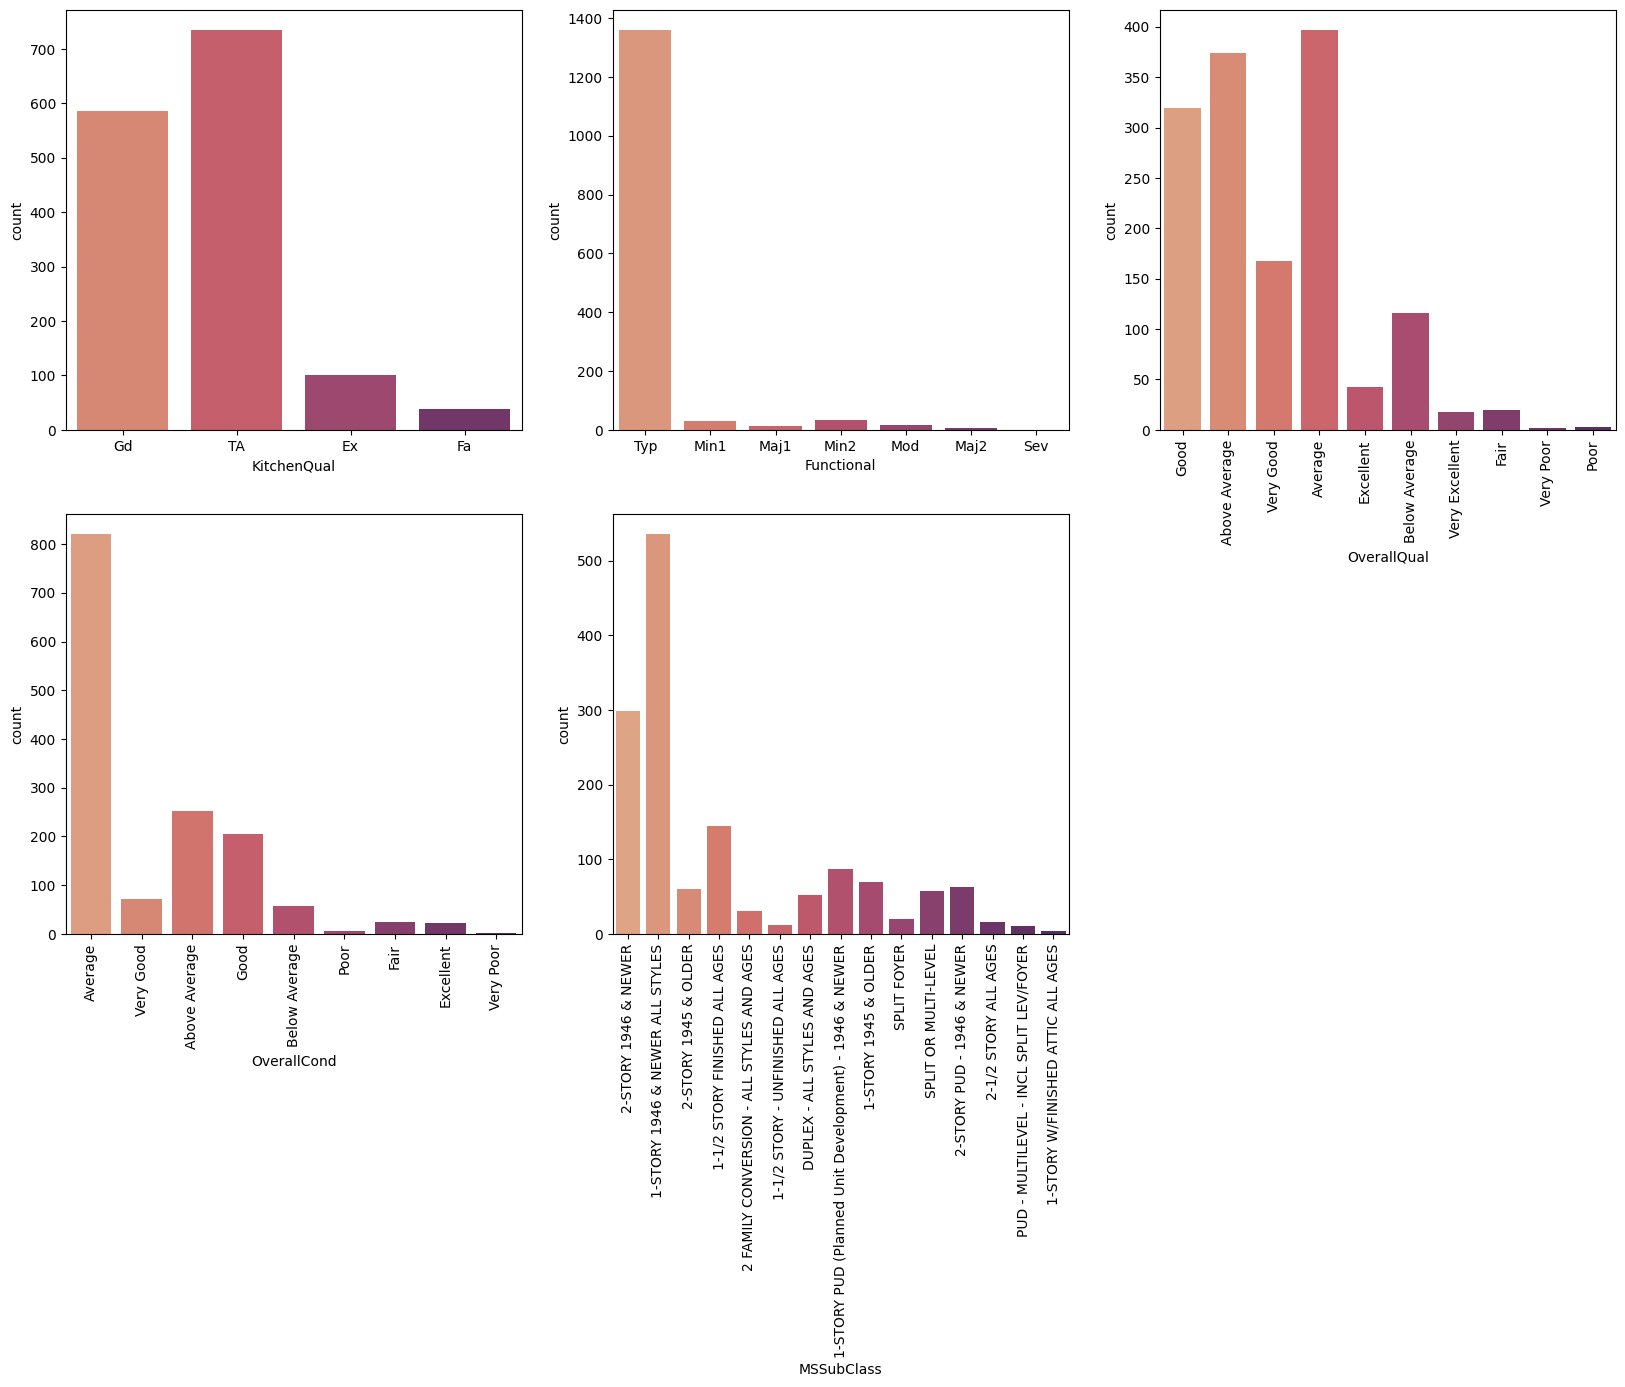

In [382]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = data, palette ="flare")
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = data, palette ="flare")
plt.xticks(rotation=90)


plt.show()

In [383]:
# we can say functional coloumns are skewed
data.drop(['Functional'],axis=1,inplace=True)

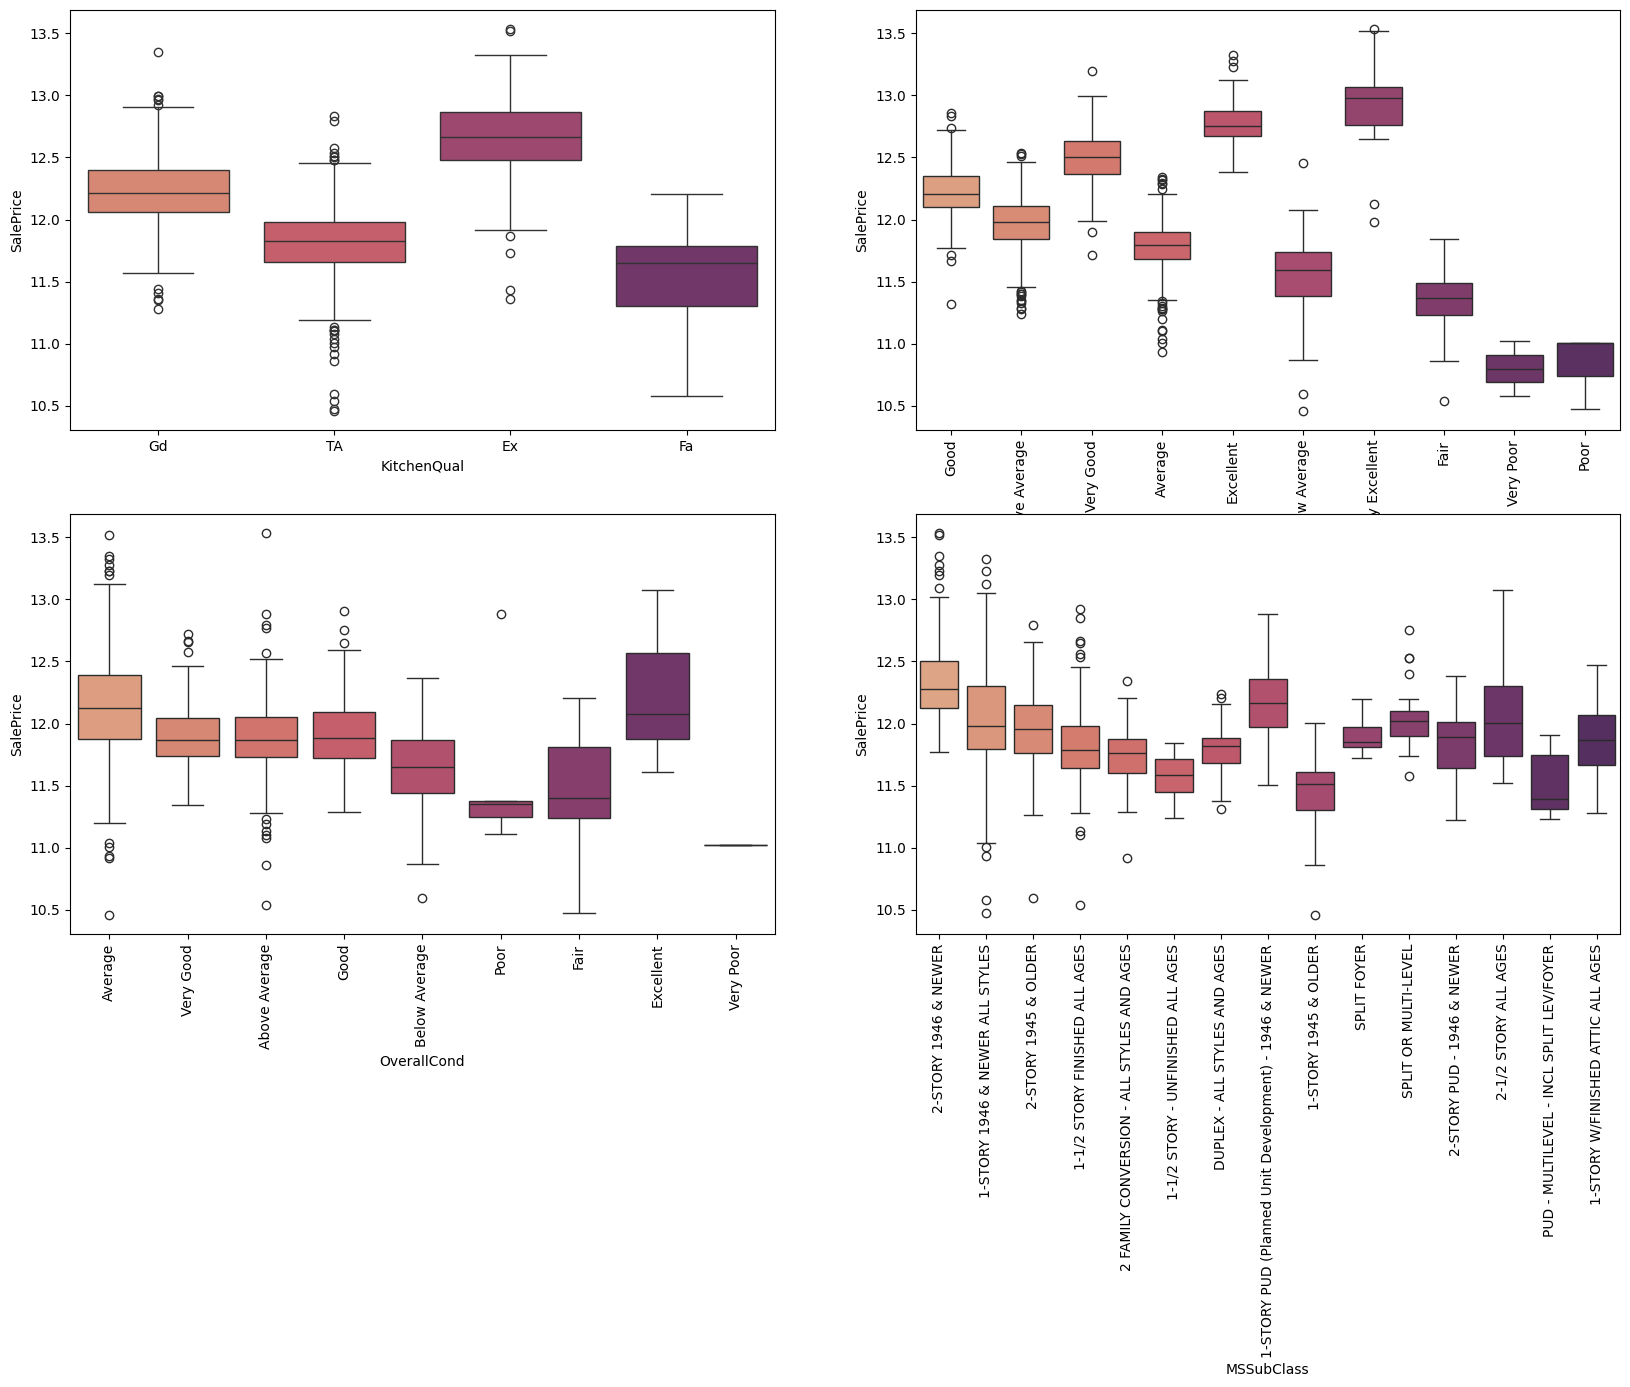

In [384]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice',data = data, palette ="flare")
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data, palette ="flare")
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data, palette ="flare")
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = data, palette ="flare")
plt.xticks(rotation=90)

plt.show()

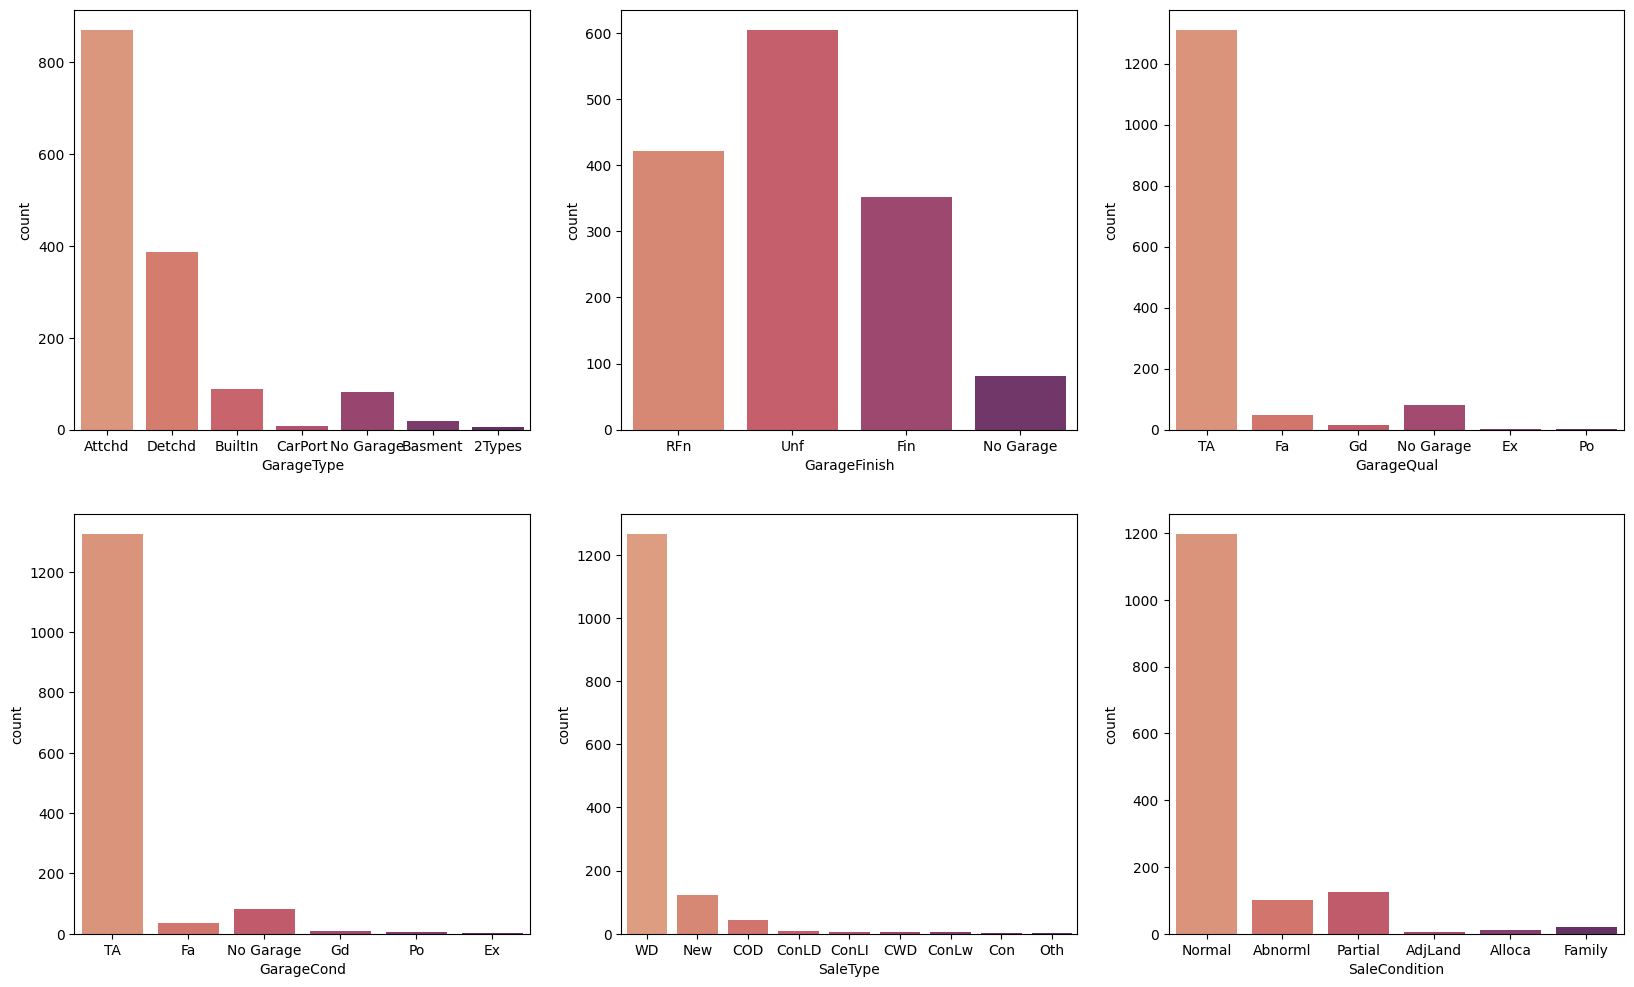

In [308]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = data, palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond',data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = data, palette ="flare")
plt.show()

In [385]:
#We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.

data['GarageType'] = data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
data['SaleCondition'] = data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')


# Dropping highly skewed column 
data.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

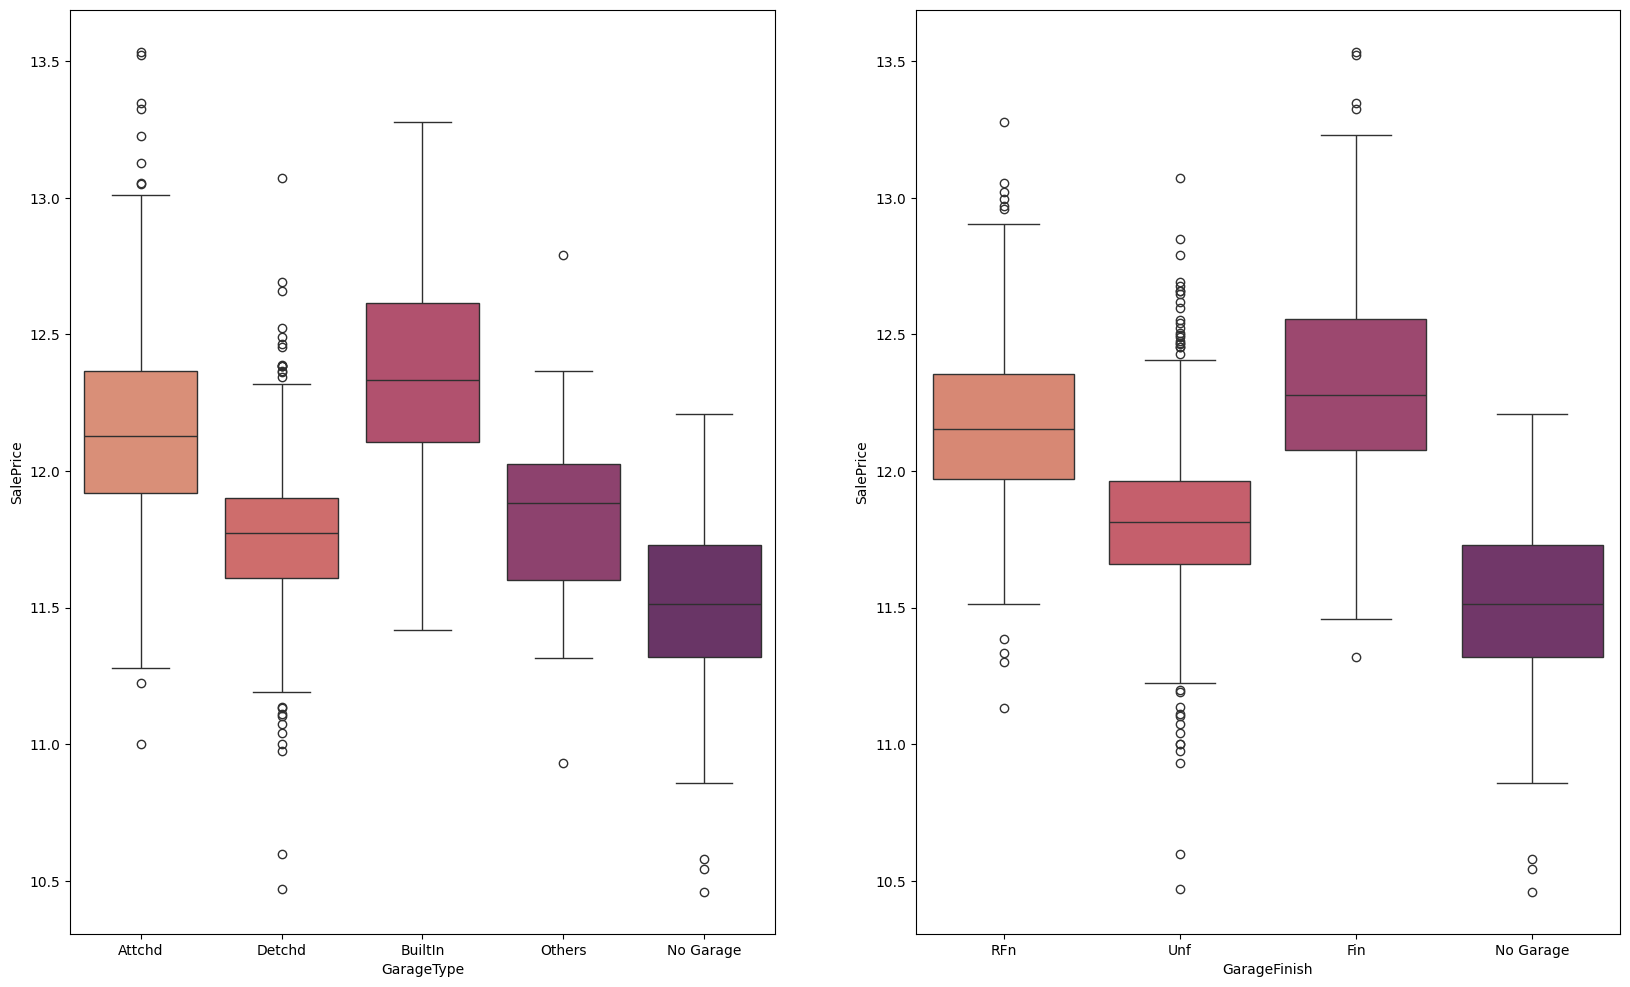

In [387]:

#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice',data = data, palette ="flare")
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = data, palette ="flare")

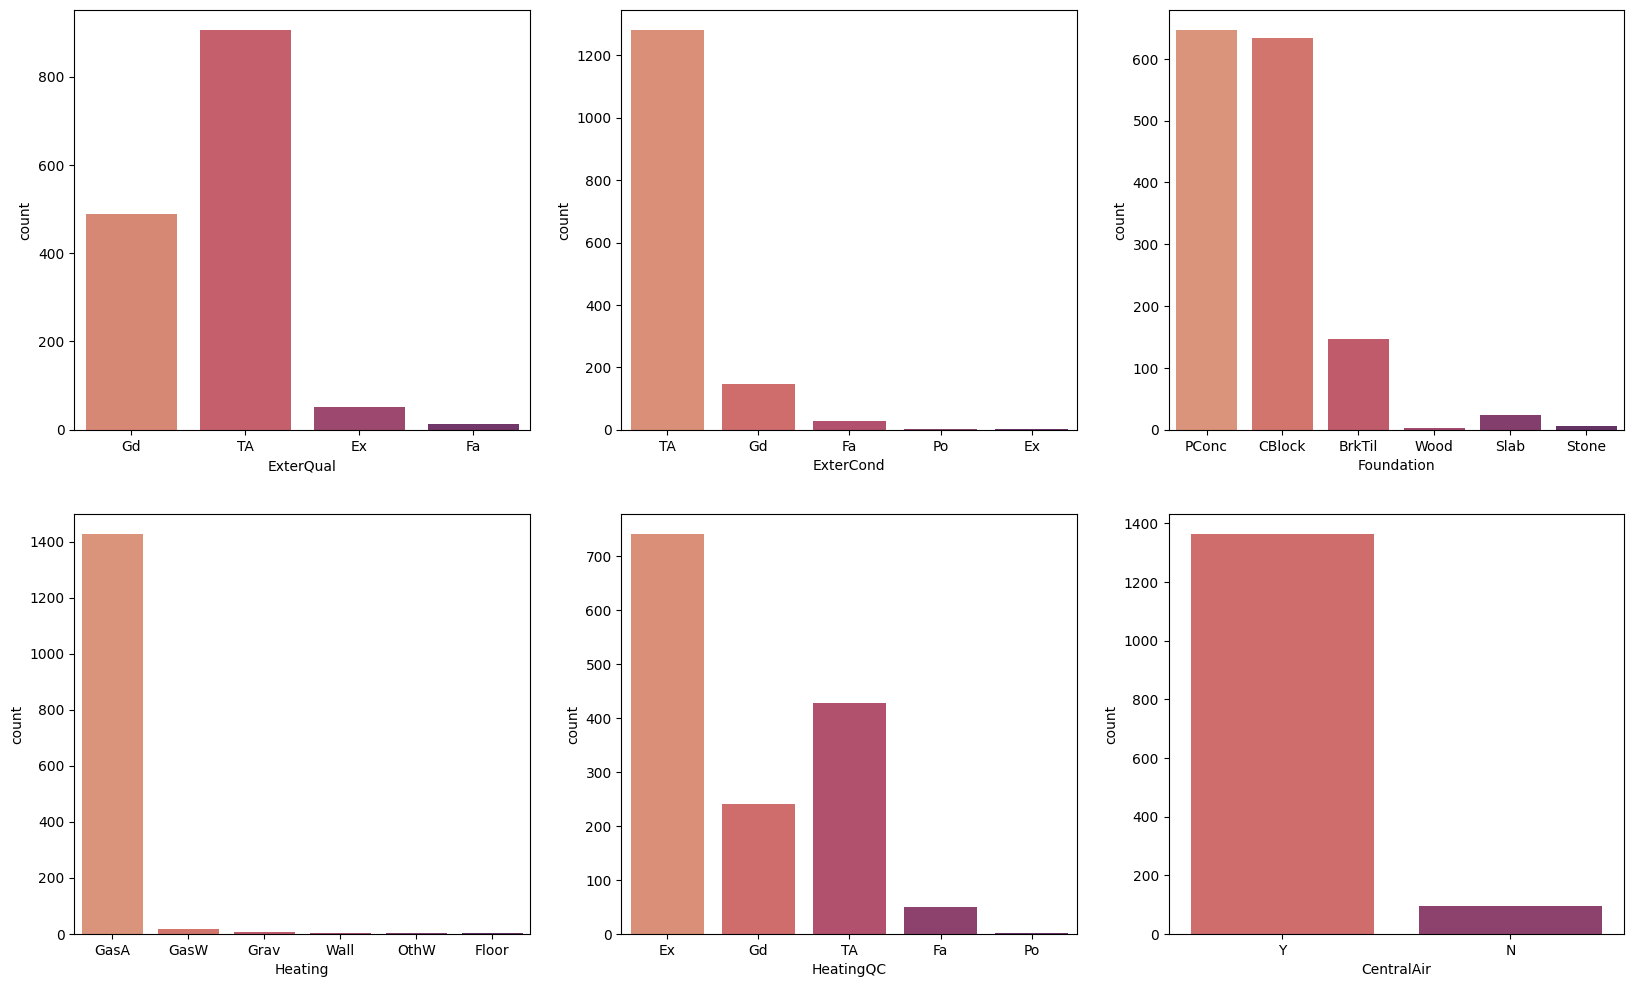

In [388]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond',data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation',data = data, palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'Heating',data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC', data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir',data = data, palette ="flare")
plt.show()

In [389]:
 # variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables
data['Foundation'] = data['Foundation'].replace(['Slab','Stone','Wood'],'Others')



# Dropping highly skewed column 
data.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

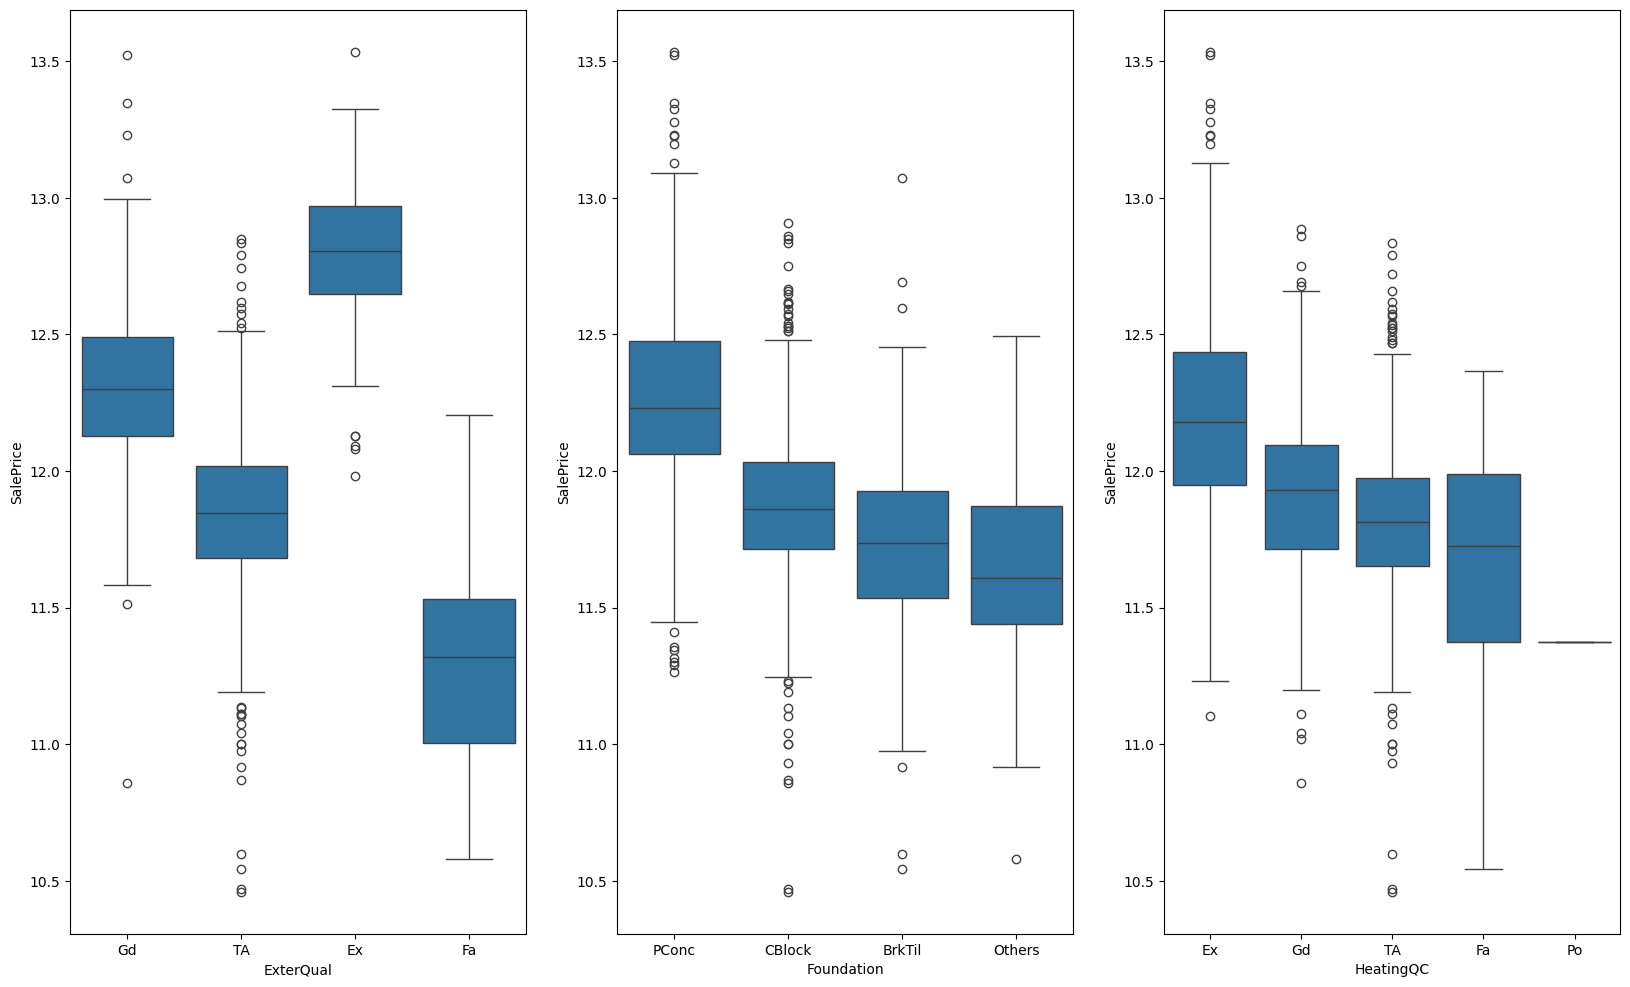

In [391]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = data)


#Price of Excellent ExterQual and HeatingQc is highest
#Price of Poured Contrete Foundation is highest.

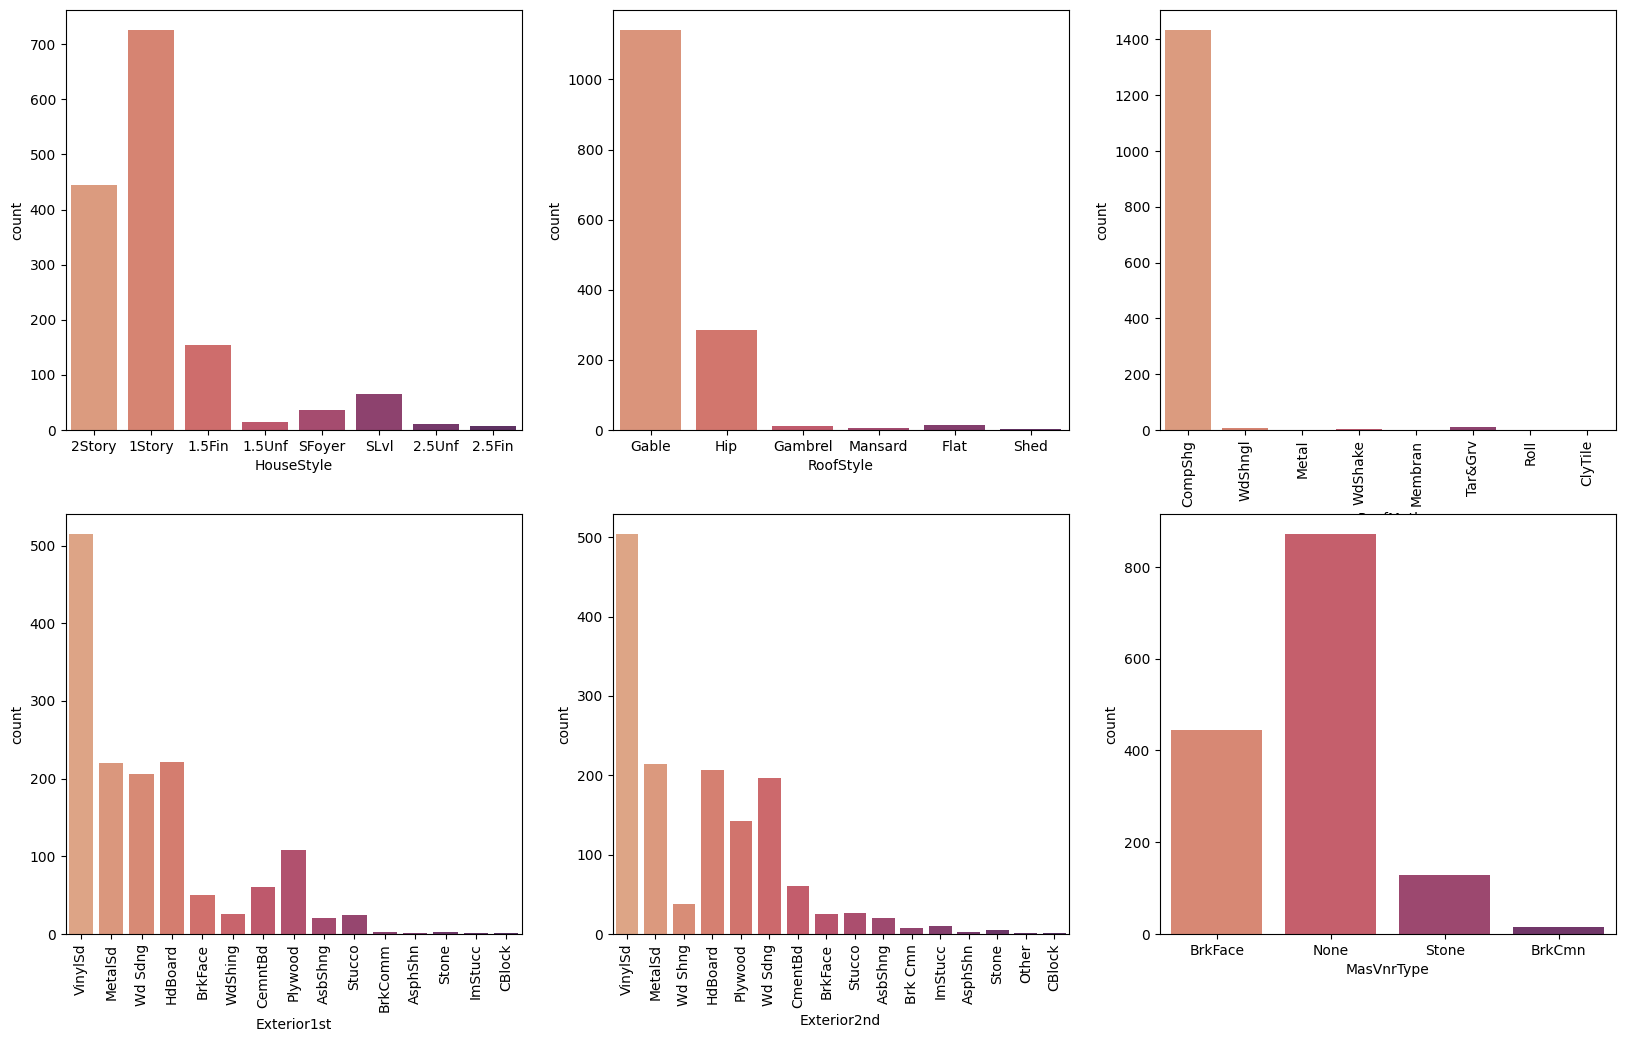

In [392]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle',  data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType',data = data, palette ="flare")
plt.show()

In [393]:
data['HouseStyle'] = data['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
data['RoofStyle'] = data['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
data['Exterior1st'] = data['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
data['Exterior2nd'] = data['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')




# Dropping highly skewed column 
data.drop(['RoofMatl'],axis=1,inplace=True)

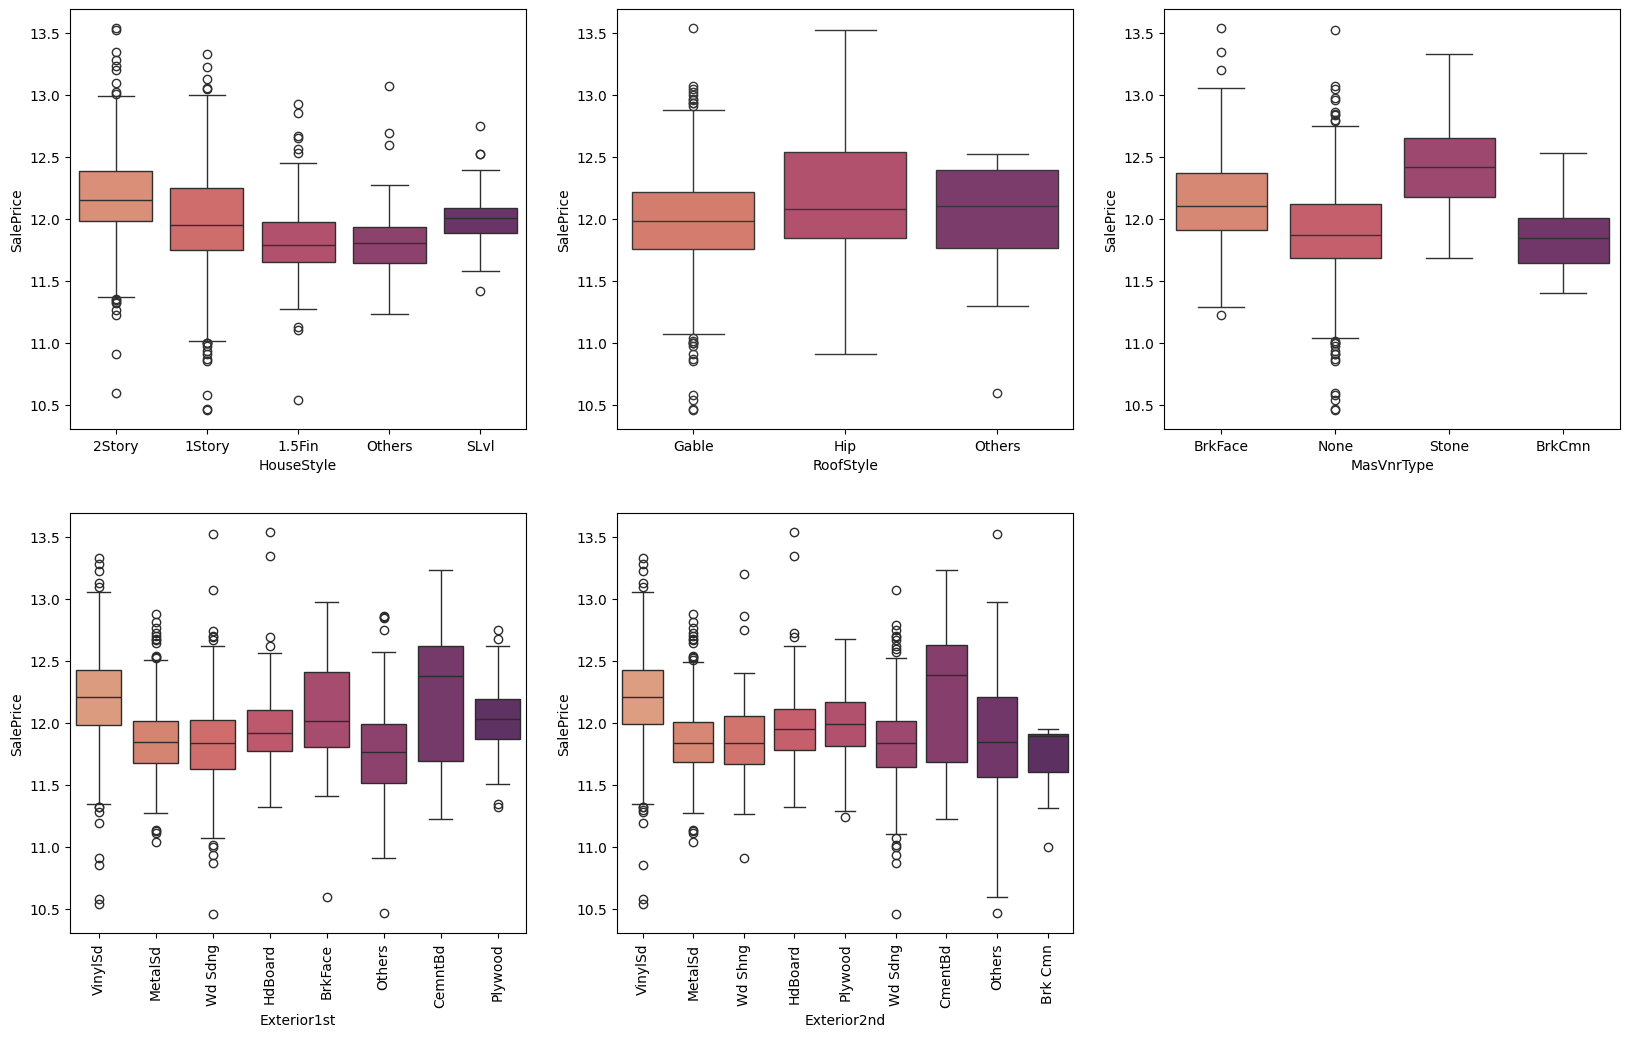

In [394]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice',data = data, palette ="flare")
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice',data = data, palette ="flare")
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data, palette ="flare")
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.show()

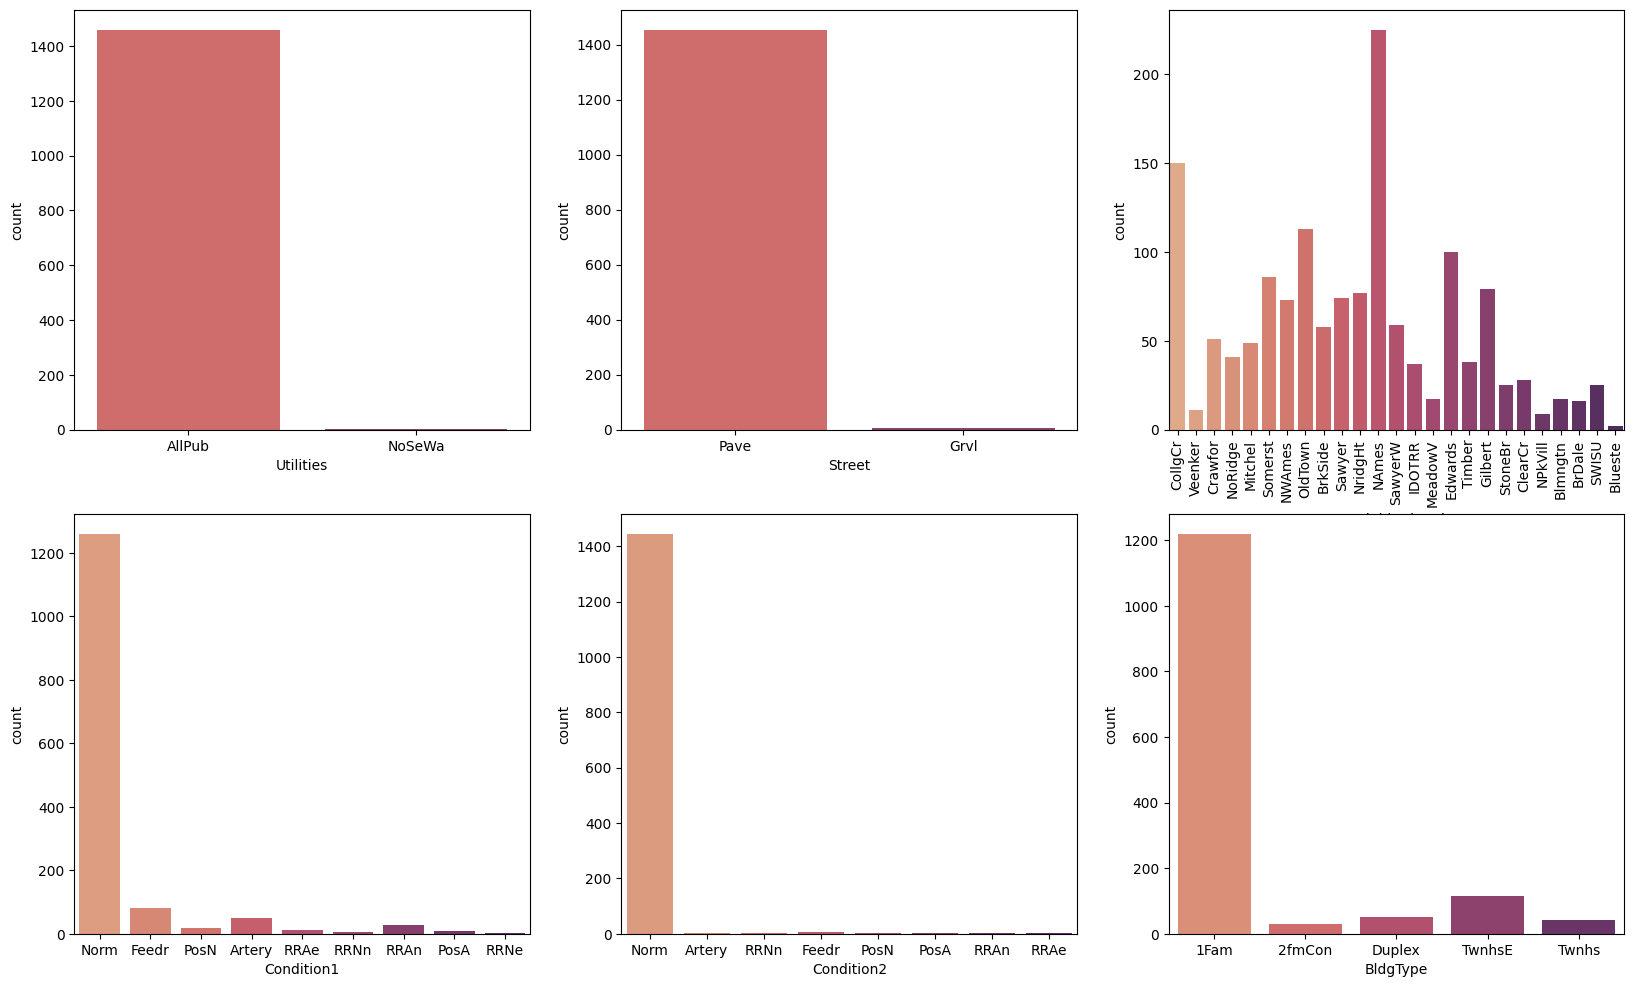

In [395]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities', data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2', data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = data, palette ="flare")
plt.show()

In [396]:
data['BldgType'].value_counts()#similarly checking skewness for other columns

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [397]:
# Dropping highly skewed column 
data.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

<Axes: xlabel='BldgType', ylabel='SalePrice'>

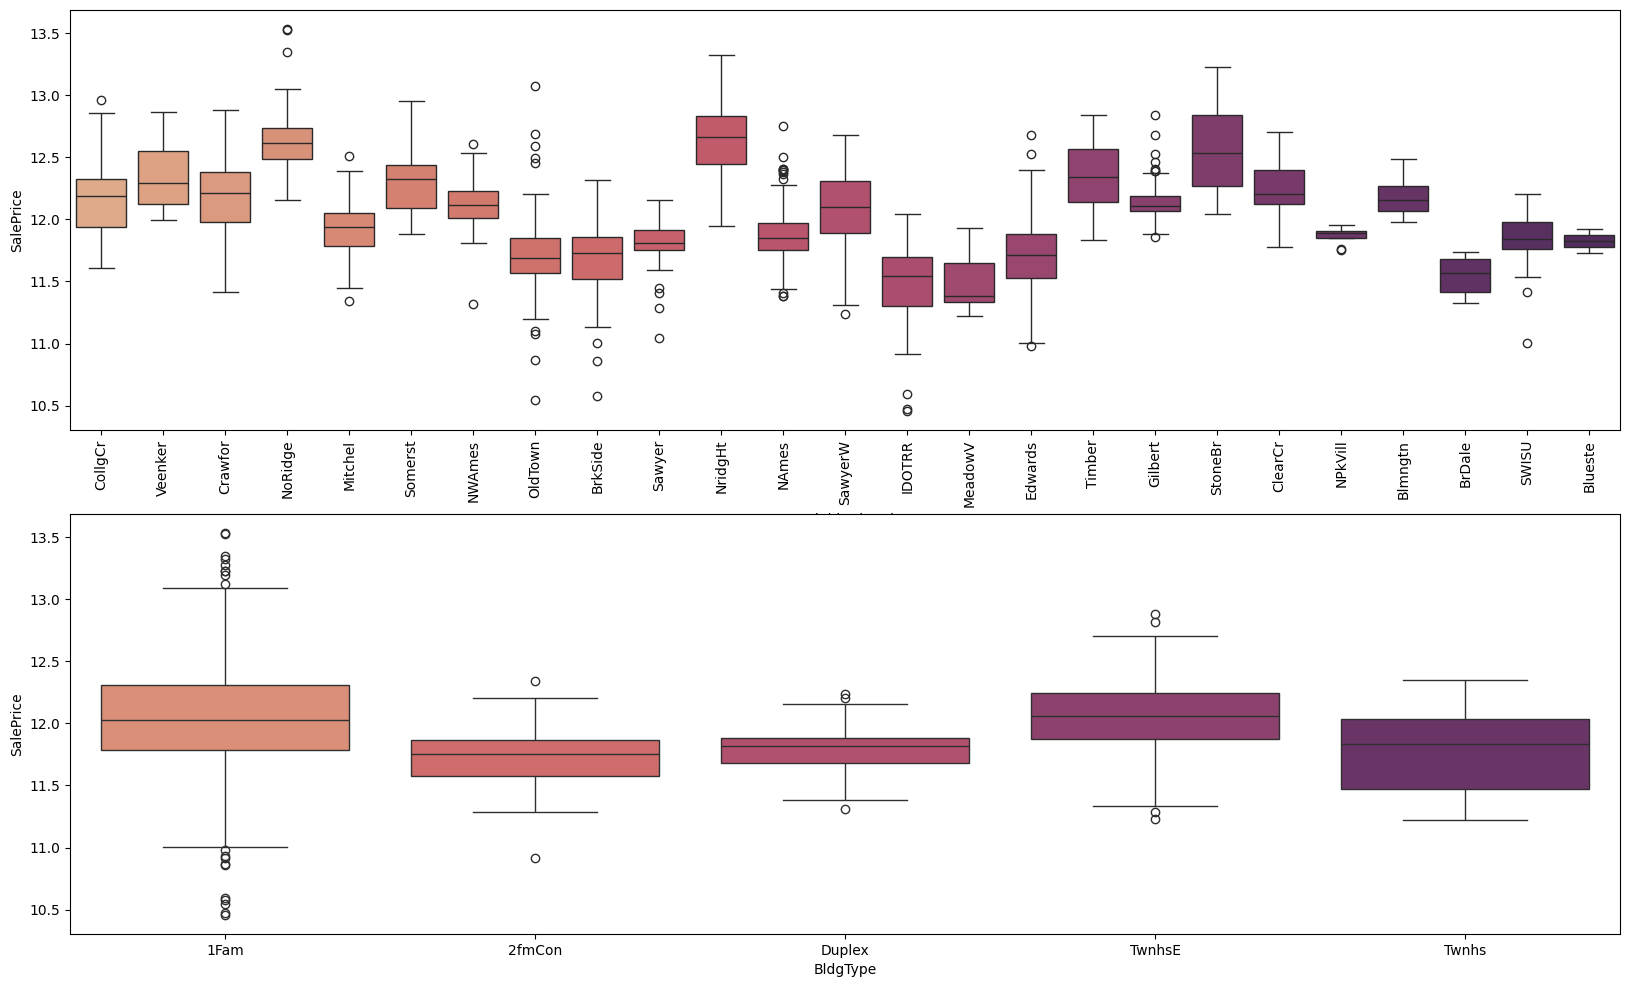

In [399]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice',  data = data, palette ="flare")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice',  data = data, palette ="flare")

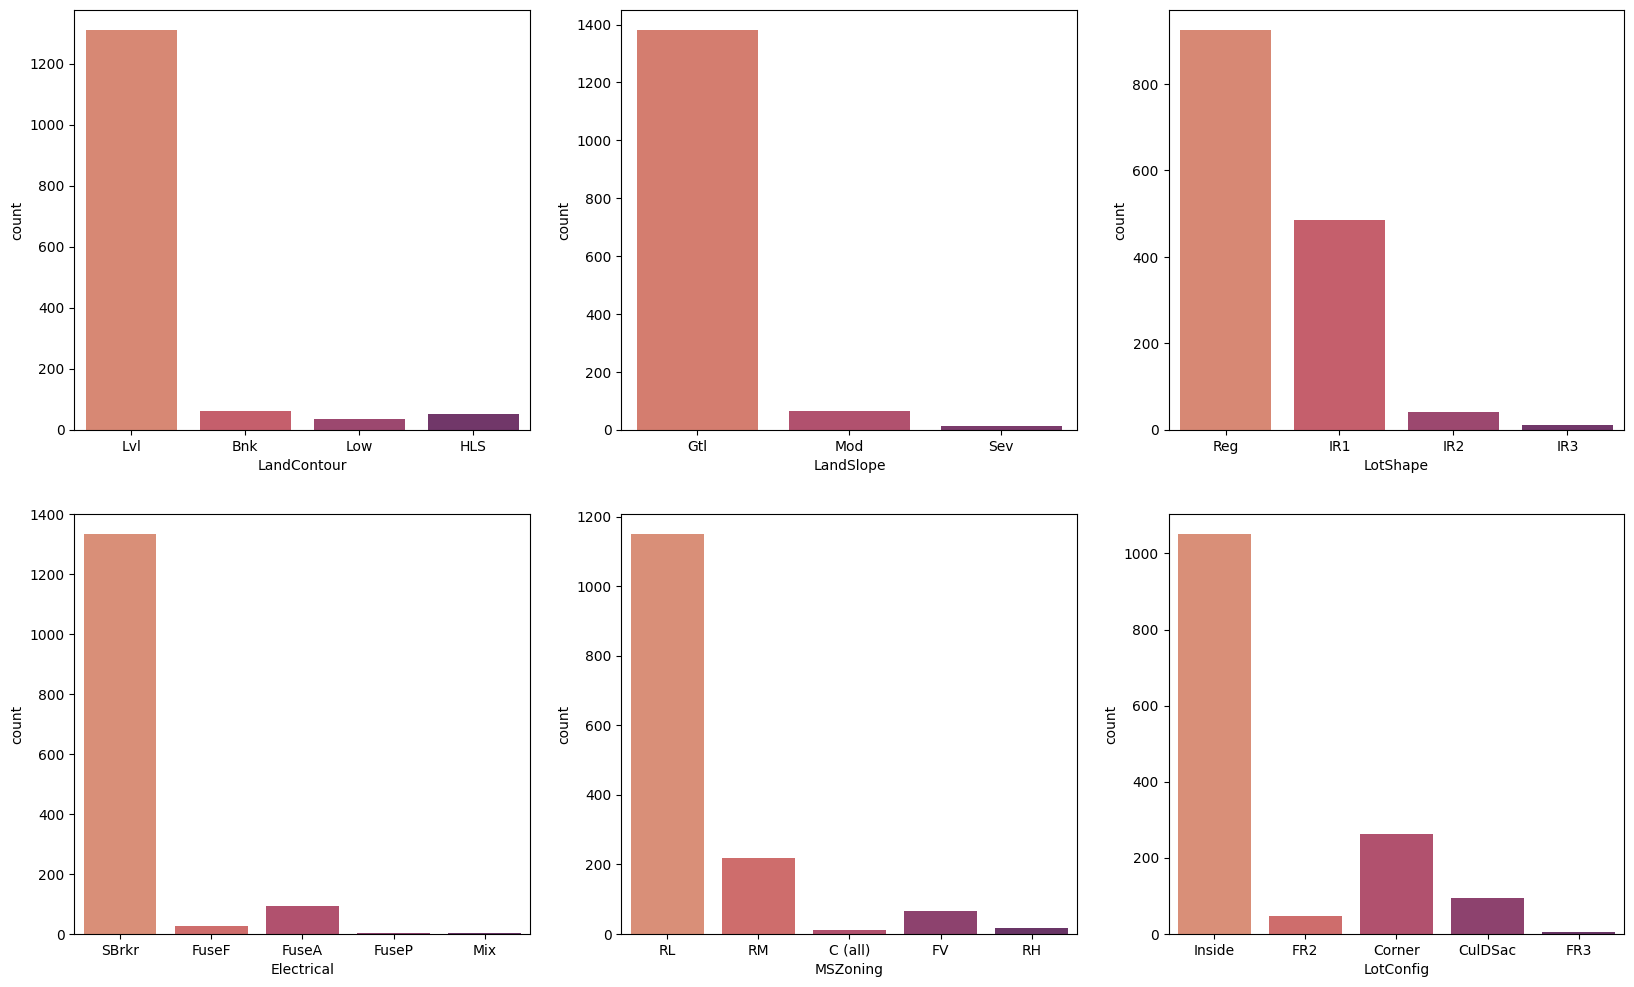

In [400]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope',  data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape',  data = data, palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = data, palette ="flare")
plt.show()

In [401]:
data['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [402]:
data.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

data['MSZoning'] = data['MSZoning'].replace(['RH','C (all)'],'Others')

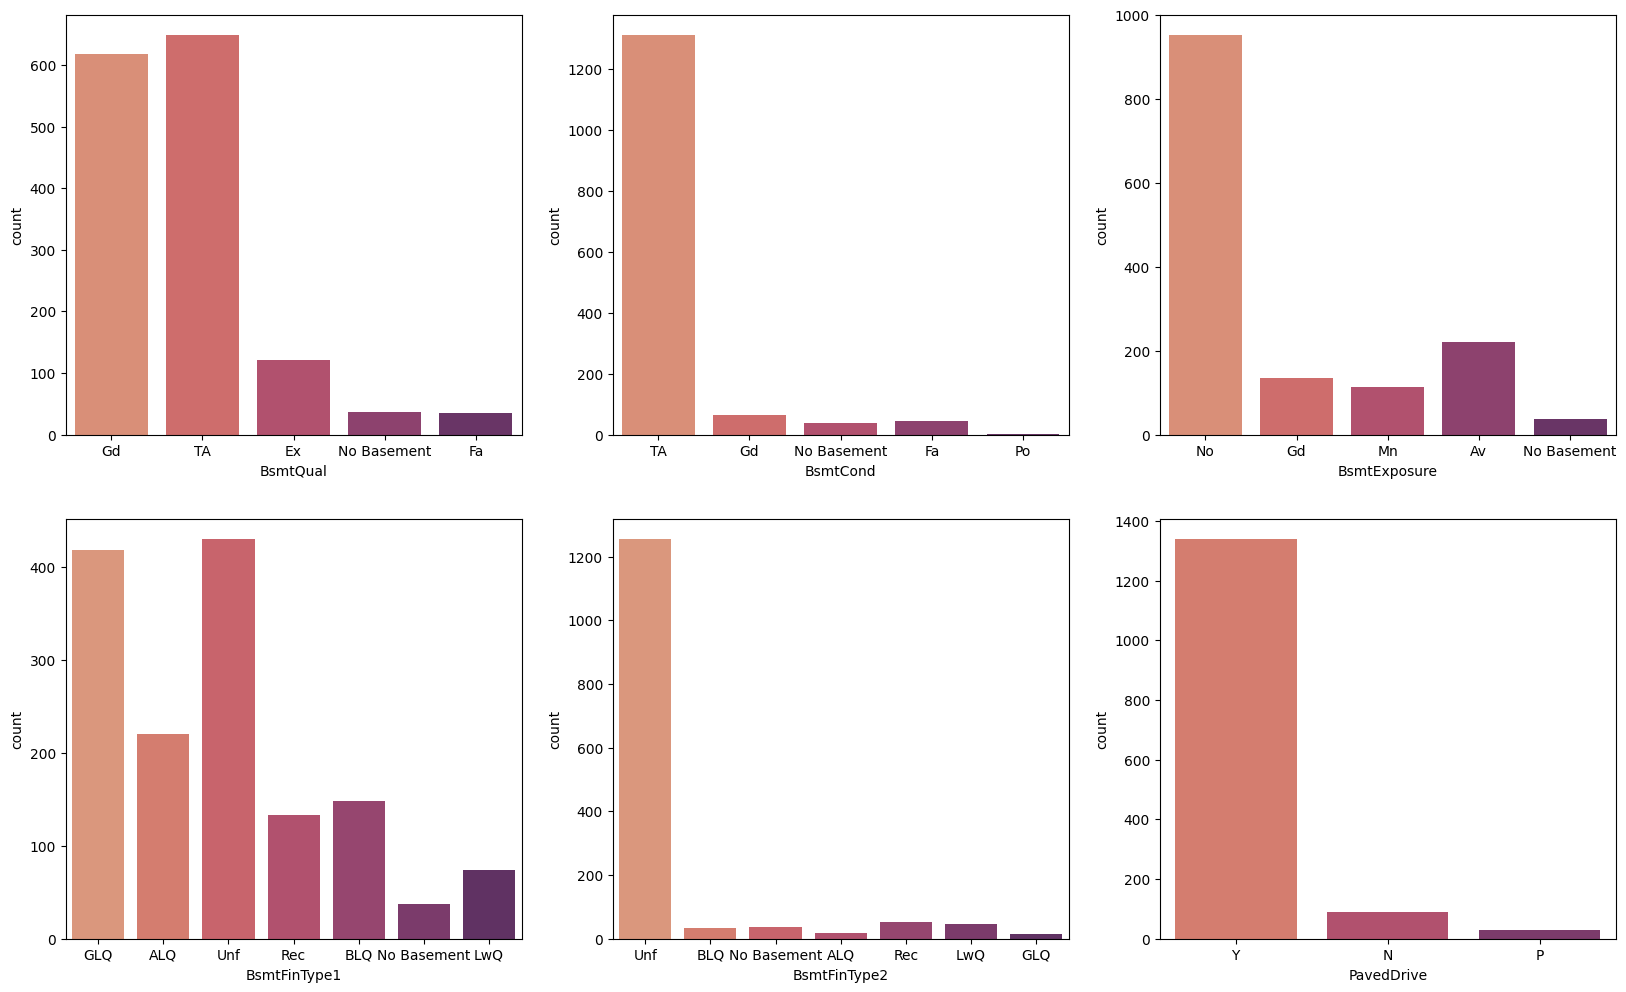

In [404]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual', data = data, palette ="flare")
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond',data = data, palette ="flare")
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure',data = data, palette ="flare")
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = data, palette ="flare")
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = data, palette ="flare")
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = data, palette ="flare")
plt.show()


In [405]:
data.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [408]:
data['YearSinceRemodel'] = 2010 - ((data['YearRemodAdd'] - data['YearBuilt']) + data['YearBuilt']) #feature engineering

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   object 
 10  OverallCond       1460 non-null   object 
 11  YearBuilt         1460 non-null   int64  
 12  YearRemodAdd      1460 non-null   int64  
 13  RoofStyle         1460 non-null   object 
 14  Exterior1st       1460 non-null   object 
 15  Exterior2nd       1460 non-null   object 
 16  MasVnrType        1460 non-null   object 


In [410]:
Cat1 = data.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [411]:
Num = data.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'YearSinceRemodel'],
      dtype='object')

In [412]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [413]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False


In [414]:

# concat dummy variables with main dataset
data = pd.concat([data, Cat1], axis=1) 

In [415]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,...,False,False,False,False,False,True,False,True,False,False
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,...,False,False,False,False,False,True,False,True,False,False
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,...,False,False,False,False,False,True,False,True,False,False
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,...,False,True,False,False,False,False,True,False,False,False
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
#removing columns as dummy variables 
data.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True)

In [419]:
data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,False,False,False,False,False,True,False,True,False,False


In [422]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
#lets try feature x and y variable for data moduling

In [424]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)                                      

In [ ]:
#Ridge Regression

In [429]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [430]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018789,0.009820,0.004197,0.000979,0.00004,{'alpha': 4e-05},0.868246,0.777081,0.838201,0.890474,...,0.853287,0.042834,5,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
1,0.011393,0.002058,0.004197,0.001469,0.0001,{'alpha': 0.0001},0.868247,0.777081,0.838201,0.890476,...,0.853288,0.042836,4,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
2,0.009191,0.001464,0.003598,0.000491,0.001,{'alpha': 0.001},0.868258,0.777072,0.838200,0.890516,...,0.853309,0.042858,3,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
3,0.008594,0.000490,0.002998,0.000002,0.01,{'alpha': 0.01},0.868367,0.776981,0.838188,0.890866,...,0.853502,0.043071,2,0.924368,0.935766,0.931026,0.919953,0.918902,0.926003,0.006484
4,0.009194,0.000400,0.003398,0.000799,0.1,{'alpha': 0.1},0.869382,0.776055,0.838034,0.892791,...,0.854768,0.044649,1,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505


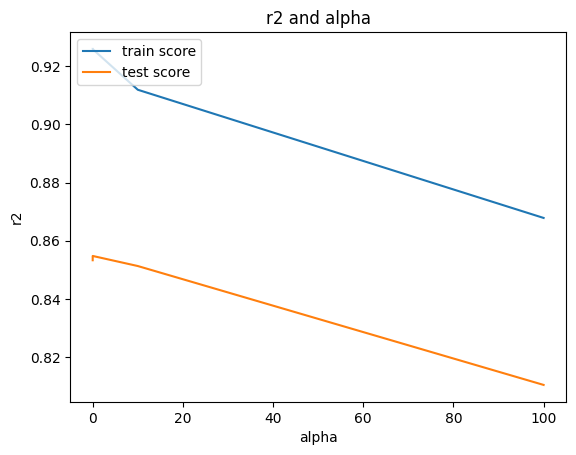

In [431]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [432]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.74809780e-04,  1.59466646e-06,  6.17112057e-06,  3.73538337e-06,
        1.15081409e-05,  1.82053027e-05,  3.34488395e-05,  7.92009091e-05,
        1.09011751e-04, -7.70408574e-05,  1.11171802e-04,  4.25420135e-02,
        1.51319614e-02,  5.09516505e-02,  3.69272171e-02,  9.07794039e-03,
       -8.12648652e-02,  8.30696546e-03,  3.96097675e-02,  5.34751466e-02,
        3.43279188e-05,  9.90267283e-05, -5.47707192e-05,  1.22380757e-04,
        1.94886076e-04,  2.27453067e-04, -4.04142867e-04, -3.68907754e-06,
        5.21312292e-04, -1.59513446e-03,  1.22746032e-02, -8.43053932e-02,
        4.98263439e-02,  5.96932189e-03,  1.37128949e-04, -1.20780328e-02,
        2.35023365e-02,  2.51877006e-02, -1.48351396e-05, -4.06689958e-02,
        1.48370219e-02, -2.89980792e-02,  2.13765700e-02,  9.23512984e-03,
       -7.75969900e-02,  1.25978119e-02, -2.93034632e-02,  2.18691748e-02,
       -4.94699235e-02,  7.41424037e-03,  3.66405387e-02, -3.24003086e-02,
       -1.39715714e-02, -

In [433]:
ridge.score(X_train,y_train)

0.9092068605070026

In [434]:
ridge.score(X_test,y_test)

0.8744204967072808

In [435]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.541),
 ('LotFrontage', -0.143),
 ('LotArea', -0.091),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.084),
 ('BsmtFinSF2', -0.082),
 ('BsmtUnfSF', -0.081),
 ('TotalBsmtSF', -0.078),
 ('1stFlrSF', -0.069),
 ('2ndFlrSF', -0.066),
 ('LowQualFinSF', -0.066),
 ('GrLivArea', -0.064),
 ('BsmtFullBath', -0.062),
 ('BsmtHalfBath', -0.06),
 ('FullBath', -0.055),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.052),
 ('TotRmsAbvGrd', -0.052),
 ('Fireplaces', -0.052),
 ('GarageCars', -0.051),
 ('GarageArea', -0.051),
 ('WoodDeckSF', -0.051),
 ('OpenPorchSF', -0.05),
 ('EnclosedPorch', -0.049),
 ('3SsnPorch', -0.048),
 ('ScreenPorch', -0.048),
 ('PoolArea', -0.046),
 ('MiscVal', -0.042),
 ('MoSold', -0.041),
 ('YearSinceRemodel', -0.033),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.032),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.032),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.032),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

In [ ]:
#Lasso Regression

In [436]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [437]:
cv_results = pd.DataFrame(model_cv.cv_results_)

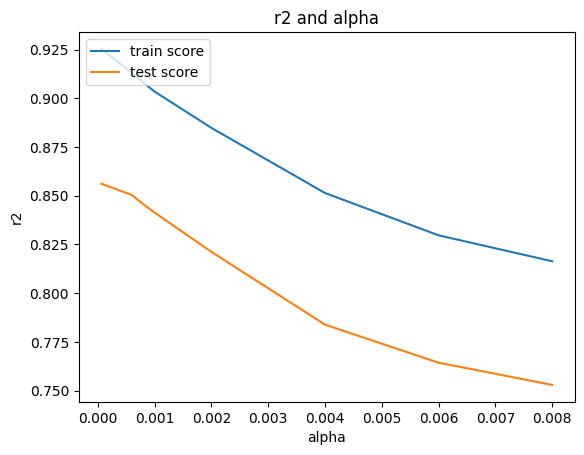

In [438]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [439]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [440]:
lasso.coef_

array([-4.09356126e-04,  1.41043514e-06,  1.80666838e-05,  4.75861642e-05,
        4.91108947e-05,  5.55828023e-05,  3.22848128e-05,  1.72776225e-04,
        1.95176491e-04, -2.93129965e-05,  2.33960625e-05,  4.05631982e-02,
        8.97338843e-04,  4.46795488e-02,  3.11477938e-02,  1.36517476e-03,
       -9.96565920e-02,  9.16320797e-03,  4.00955714e-02,  6.11563721e-02,
        3.68096081e-05,  1.11663349e-04, -4.88469932e-05,  1.16324360e-04,
        1.94148996e-04,  2.48687005e-04, -4.72011474e-04, -3.65282465e-06,
        4.33777426e-04, -2.04610388e-03,  0.00000000e+00, -1.01268932e-01,
        3.91866781e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.15042585e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.80791267e-02,  7.18055960e-03, -3.22277887e-02,  0.00000000e+00,
       -3.77577996e-03,  0.00000000e+00,  3.38538223e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [442]:
lasso.score(X_train,y_train)

0.898288939025357

In [443]:
lasso.score(X_test,y_test)

0.8646575331441892

In [444]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.482),
 ('LotFrontage', -0.21),
 ('LotArea', -0.101),
 ('MasVnrArea', -0.1),
 ('BsmtFinSF1', -0.086),
 ('BsmtFinSF2', -0.083),
 ('BsmtUnfSF', -0.078),
 ('TotalBsmtSF', -0.066),
 ('1stFlrSF', -0.057),
 ('2ndFlrSF', -0.055),
 ('LowQualFinSF', -0.053),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.042),
 ('BsmtHalfBath', -0.039),
 ('FullBath', -0.037),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.032),
 ('Fireplaces', -0.03),
 ('GarageCars', -0.029),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.024),
 ('OpenPorchSF', -0.022),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.018),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.017),
 ('MiscVal', -0.017),
 ('MoSold', -0.017),
 ('YearSinceRemodel', -0.016),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.01),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

In [ ]:
#Conclusion :
#we got a decent score for both Ridge and Lasso regression.
#Ridge : Train :90.9 Test :87.4
#Lasso : Train :89.8 Test :86.4

In [ ]:
#Optimal Values
Optimal Value of lamda for ridge : 10
Optimal Value of lamda for Lasso : 0.001

In [ ]:
#So, the company can purchase houses below the market value by highlighting the negative parameters.
#Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight 
#and sell the houses by mainly highlighting the positive features.